## preprocessing
- 누적값 처리(ex.누적 강수량 -> 시간당 강수량)
- 상관관계 확인 
- X14, X16, X19은 min=max=0 -> 필요없을 input 처리
- 변하는 패턴 확인

In [0]:
import pandas as pd
import numpy as np
train=pd.read_csv("train.csv")
train.head(3)

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

In [0]:
test = pd.read_csv('test.csv')

In [0]:
#같은 feauture?
f_temp=train[['X00','X07','X28','X31','X32']] #기온
f_atmos=train[['X01','X06','X22','X27','X29']] #현지기압
f_wind=train[['X02','X03','X18','X24','X26']] #풍속
f_rain=train[['X04','X10','X21','X36','X39']] #일일누적강수량
f_sea=train[['X05','X08','X09','X23','X33']] #해면기압
f_solar=train[['X11','X14','X16','X19','X34']] #일일누적일사량
f_hum=train[['X12','X20','X30','X37','X38']] #습도
f_dir=train[['X13','X15','X17','X25','X35']] #풍향

In [0]:
#같은 feauture? test데이터
f_temp_test=test[['X00','X07','X28','X31','X32']] #기온
f_atmos_test=test[['X01','X06','X22','X27','X29']] #현지기압
f_wind_test=test[['X02','X03','X18','X24','X26']] #풍속
f_rain_test=test[['X04','X10','X21','X36','X39']] #일일누적강수량
f_sea_test=test[['X05','X08','X09','X23','X33']] #해면기압
f_solar_test=test[['X11','X14','X16','X19','X34']] #일일누적일사량
f_hum_test=test[['X12','X20','X30','X37','X38']] #습도
f_dir_test=test[['X13','X15','X17','X25','X35']] #풍향

In [0]:
f_temp.head()

,X00,X07,X28,X31,X32
0,9.7,12.2,12.3,8.2,10.7
1,9.3,12.1,12.1,8.3,10.3
2,9.4,12.1,12.1,8.0,9.7
3,9.4,12.0,12.1,7.7,9.4
4,9.2,12.0,12.0,7.4,9.4


In [0]:
#누적값 처리
f_solar_each=f_solar.diff().clip(lower=0)
f_rain_each=f_rain.diff().clip(lower=0)

In [0]:
f_solar_test_each=f_solar_test.diff().clip(lower=0)
f_rain_test_each=f_rain_test.diff().clip(lower=0)

In [0]:
f_solar_each.head()

,X11,X14,X16,X19,X34
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [0]:
f_rain_each.head()

,X04,X10,X21,X36,X39
0,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [0]:
#nan값 처리 
f_solar_each[np.isnan(f_solar_each)] = 0
f_rain_each[np.isnan(f_rain_each)] = 0
#test 데이터 nan처리
f_solar_test_each[np.isnan(f_solar_test_each)] = 0
f_rain_test_each[np.isnan(f_rain_test_each)] = 0

```python
#동일한 feature에 해당하는 col은 평균으로 처리 
train['temp'] = (train['X00']+train['X07']+train['X28']+train['X31']+train['X32'])/5  #기온
train['atmos'] = (train['X01']+train['X06']+train['X22']+train['X27']+train['X29'])/5 #현지기압
train['wind'] = (train['X02']+train['X03']+train['X18']+train['X24']+train['X26'])/5  #풍속
train['rain'] = (f_rain_each['X04']+f_rain_each['X10']+f_rain_each['X21']+f_rain_each['X36']+f_rain_each['X39'])/5  #일일누적강수량
train['sea'] = (train['X05']+train['X08']+train['X09']+train['X23']+train['X33'])/5   #해면기압
train['solar'] = (f_solar_each['X11']+f_solar_each['X24']+f_solar_each['X16']+f_solar_each['X19']+f_solar_each['X34'])/5 #일일누적일사량
train['hum'] = (train['X12']+train['X20']+train['X30']+train['X37']+train['X38'])/5   #습도
train['dir'] = (train['X13']+train['X15']+train['X17']+train['X25']+train['X35'])/5   #풍향
train.head(3) #8개
```

In [0]:
#전체 train 가져가는 경우 
train_all=pd.concat([f_solar_each,f_rain_each,f_temp, f_atmos, f_wind, f_sea, f_hum, f_dir],axis=1)

In [0]:
#전체 test 가져가는 경우 
test_all=pd.concat([f_solar_test_each,f_rain_test_each,f_temp_test, f_atmos_test, f_wind_test, f_sea_test, f_hum_test, f_dir_test],axis=1)

In [0]:
train_all.head(3) #40개 

,X11,X14,X16,X19,X34,X04,X10,X21,X36,X39,X00,X07,X28,X31,X32,X01,X06,X22,X27,X29,X02,X03,X18,X24,X26,X05,X08,X09,X23,X33,X12,X20,X30,X37,X38,X13,X15,X17,X25,X35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,1001.6,1.2,0.6,0.3,1.1,0.5,1009.3,1009.9,1009.8,1009.8,1010.1,82.4,91.0,69.1,77.2,62.6,71.3,101.1,56.1,2.3,256.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,1001.7,1.7,1.9,0.4,0.0,0.0,1009.3,1010.0,1009.9,1009.9,1010.1,81.2,91.9,70.3,77.3,63.5,121.8,165.3,0.0,0.0,215.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,1001.6,1.1,2.3,0.6,0.0,0.0,1009.2,1010.1,1010.1,1009.8,1010.0,86.1,93.3,71.5,77.3,63.9,232.0,144.0,0.0,0.0,235.2


In [0]:
test_all.head()

,X11,X14,X16,X19,X34,X04,X10,X21,X36,X39,X00,X07,X28,X31,X32,X01,X06,X22,X27,X29,X02,X03,X18,X24,X26,X05,X08,X09,X23,X33,X12,X20,X30,X37,X38,X13,X15,X17,X25,X35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,21.1,23.2,17.5,19.2,987.4,987.7,1000.3,1006.0,999.5,1.5,1.3,1.1,0.0,0.1,1006.8,1007.5,1007.2,1007.6,1007.6,96.1,94.7,91.4,84.0,59.9,333.6,199.6,36.0,0.0,194.7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.8,21.2,23.1,17.4,19.1,987.4,987.7,1000.2,1005.9,999.4,1.1,1.2,0.6,0.0,0.3,1006.7,1007.5,1007.2,1007.5,1007.5,96.2,95.3,91.6,84.0,60.5,335.5,194.0,127.7,0.0,173.1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,21.2,23.1,17.2,19.0,987.4,987.6,1000.1,1005.9,999.3,1.3,1.2,0.0,0.0,0.7,1006.6,1007.4,1007.2,1007.4,1007.5,96.4,93.9,92.0,85.0,60.8,0.0,172.9,59.0,0.0,208.6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,21.1,22.8,17.2,18.8,987.4,987.6,1000.1,1005.8,999.3,2.3,0.8,0.4,0.0,0.6,1006.6,1007.4,1007.2,1007.4,1007.4,96.5,94.4,93.0,85.8,61.2,252.9,153.5,54.9,0.0,185.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.4,20.9,22.8,17.4,18.9,987.4,987.7,1000.2,1005.9,999.2,1.1,0.7,0.8,0.0,0.7,1006.7,1007.5,1007.2,1007.3,1007.5,96.6,95.7,92.3,87.3,61.7,238.2,173.8,48.8,0.0,162.8


In [0]:
print(train_all.shape,test_all.shape)

(4752, 40) (11520, 40)


In [0]:
#30일 데이터로 먼저 학습 
X_train = train_all[:4320]
y_train = train[['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']][:4320]

In [0]:
print(X_train.shape, y_train.shape)

(4320, 40) (4320, 18)


In [0]:
#3일데이터 (전이학습)
X_18_train = train_all[4320:]
y_18_train = train[['Y18']][4320:]

In [0]:
X_18_train.shape

(432, 40)

In [0]:
# test데이터는 Y18만 예측하면 된다. 

In [0]:
X_train.head()

,X11,X14,X16,X19,X34,X04,X10,X21,X36,X39,X00,X07,X28,X31,X32,X01,X06,X22,X27,X29,X02,X03,X18,X24,X26,X05,X08,X09,X23,X33,X12,X20,X30,X37,X38,X13,X15,X17,X25,X35
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.7,12.2,12.3,8.2,10.7,988.8,989.6,1002.5,1008.7,1001.6,1.2,0.6,0.3,1.1,0.5,1009.3,1009.9,1009.8,1009.8,1010.1,82.4,91.0,69.1,77.2,62.6,71.3,101.1,56.1,2.3,256.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,12.1,12.1,8.3,10.3,988.9,989.6,1002.5,1008.7,1001.7,1.7,1.9,0.4,0.0,0.0,1009.3,1010.0,1009.9,1009.9,1010.1,81.2,91.9,70.3,77.3,63.5,121.8,165.3,0.0,0.0,215.4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.1,12.1,8.0,9.7,989.0,989.7,1002.4,1008.6,1001.6,1.1,2.3,0.6,0.0,0.0,1009.2,1010.1,1010.1,1009.8,1010.0,86.1,93.3,71.5,77.3,63.9,232.0,144.0,0.0,0.0,235.2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.4,12.0,12.1,7.7,9.4,988.9,989.6,1002.4,1008.7,1001.5,1.5,0.7,0.1,0.0,0.2,1009.2,1010.0,1010.0,1009.7,1010.1,87.7,93.4,73.2,77.5,64.5,0.0,115.9,294.1,0.0,214.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,12.0,12.0,7.4,9.4,988.9,989.7,1002.4,1008.7,1001.5,0.8,1.7,0.0,0.0,0.0,1009.2,1010.1,1010.0,1009.7,1010.1,88.9,94.1,74.3,78.0,65.0,0.0,124.7,0.0,0.0,174.9


In [0]:
#변수간 다중공산성 확인, 상관없나?
result = X_train.corr(method='pearson')

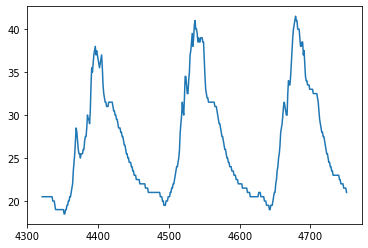

In [0]:
#target : Y18 
import matplotlib.pyplot as plt
plt.plot(train['Y18'][4321:])
plt.show()

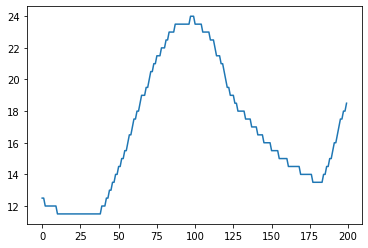

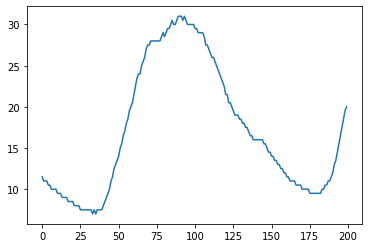

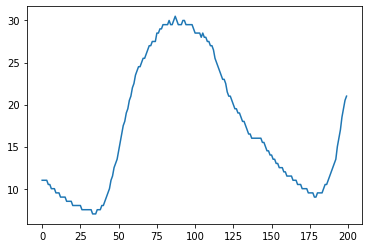

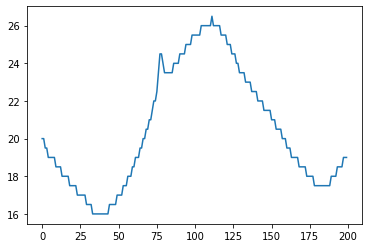

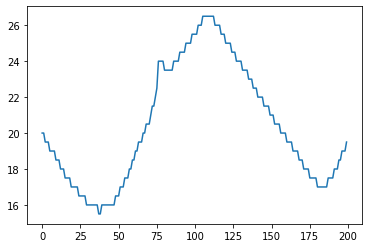

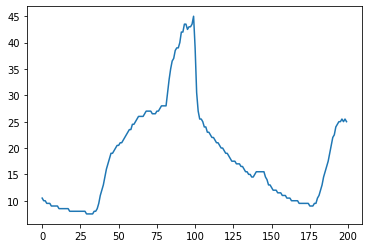

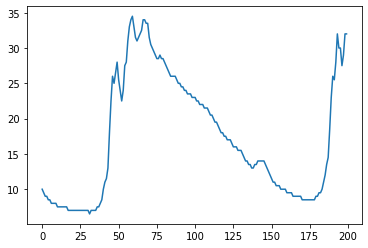

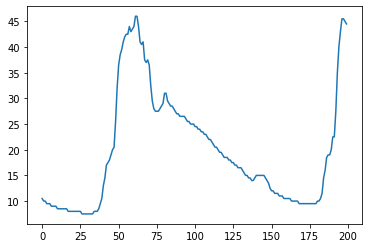

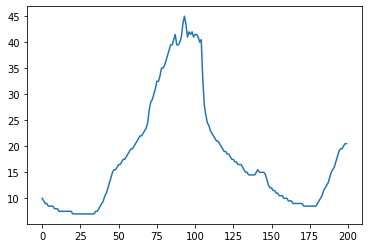

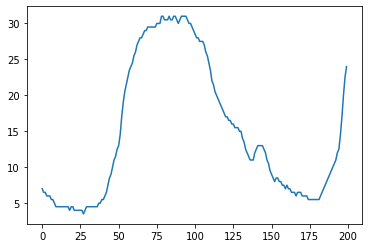

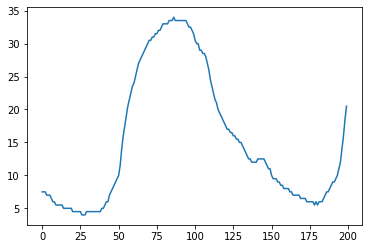

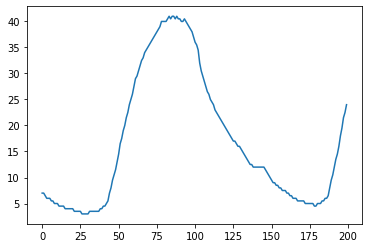

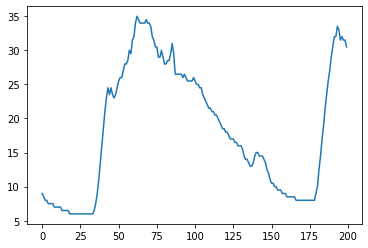

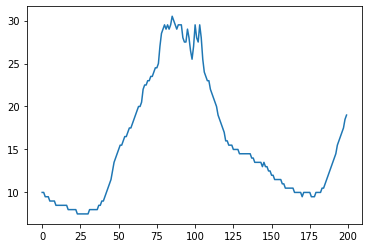

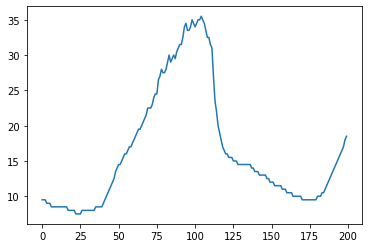

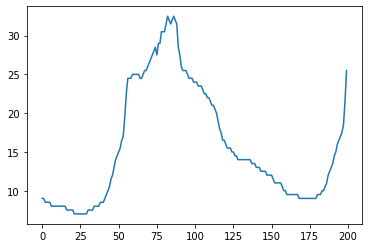

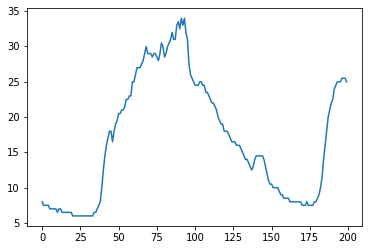

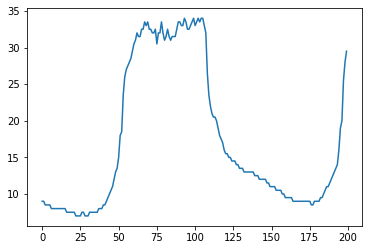

In [0]:
#target : Y00 ~ Y17
y=['Y00','Y01','Y02','Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17']
for i in range(18):
  plt.plot(train[y[i]][:200])
  plt.show()

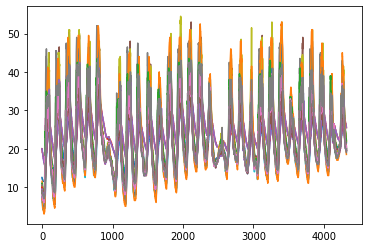

In [0]:
plt.plot(y_train)
plt.show()

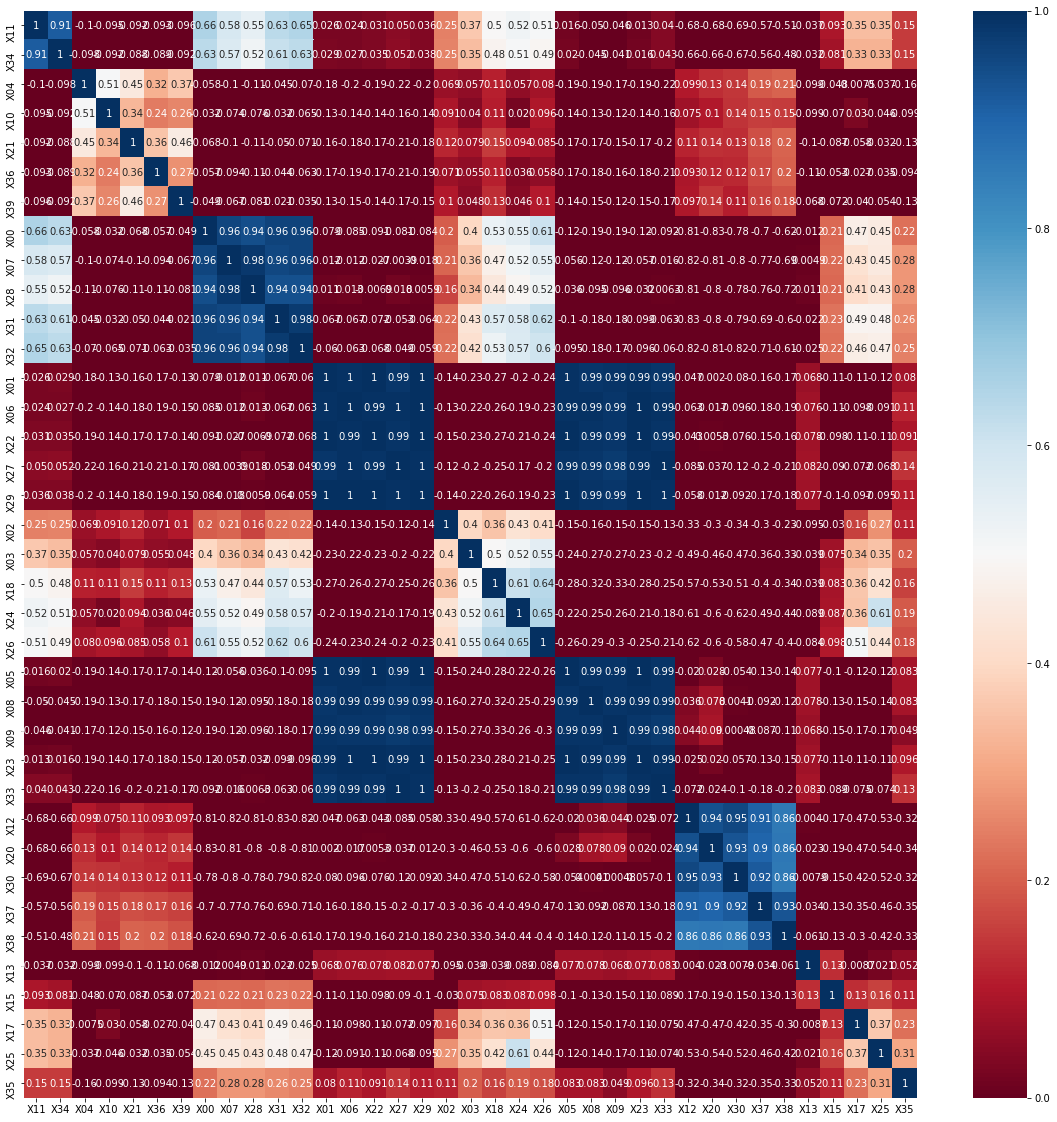

In [0]:
# X값들 간의 상관관계
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

train_corr = X_train.loc[:,:].corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(train_corr, cmap = "RdBu", annot = True,vmin=0, vmax=1)
ax.set_ylim(len(train_corr.columns),0)  
plt.show()

In [0]:
# 상관관계가 높은 열을 어떻게 처리할지 생각해보자
def high_corr(df, col, ratio):
    #Y에 대한 상관계수 데이터프레임 생성
    Y_corr = df.corr()
    Y_high = Y_corr.loc[:,Y_corr[col]> ratio].columns
    return Y_high.drop(col)

df = X_train.train.loc[:,:]
 
Y_high = high_corr(y_train, "Y17", 0.8)
print("Y17와 상관계수가 높은 Y컬럼들 ", Y_high.tolist())

Y17와 상관계수가 높은 Y컬럼들  ['Y01', 'Y02', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16']


In [0]:
#Y00~Y17의 값과 Y18과의 관계를 3일치 데이터를 통해 확인. 
#Y_high = high_corr(test, "Y18", 0.8)

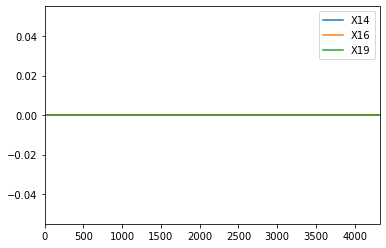

In [0]:
# 각 센서 기능확인 (모든값이 0인 열만 시각화)
X_train.plot( y = X_train.columns[X_train.max() == X_train.min()])
plt.show()
# X14, X16, X19 데이터는 모든 값이 0이므로 삭제한다. 

In [0]:
# X14, X16, X19 삭제
def same_min_max(df):
    return df.drop(df.columns[df.max() == df.min()], axis=1)

X_train = same_min_max(X_train)
test_all  = same_min_max(test_all)
X_18_train = X_18_train.drop(['X14','X16','X19'], axis=1)

In [0]:
print(X_train.shape, test_all.shape, X_18_train.shape) #결과 확인

(4320, 37) (11520, 37) (432, 37)


In [0]:
# 꼭 같지는 않더라도 이상치 있는지 확인할까
X_train.describe()

,X11,X34,X04,X10,X21,X36,X39,X00,X07,X28,X31,X32,X01,X06,X22,X27,X29,X02,X03,X18,X24,X26,X05,X08,X09,X23,X33,X12,X20,X30,X37,X38,X13,X15,X17,X25,X35
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,0.160988,0.168458,0.017546,0.015162,0.014236,0.019375,0.015741,19.965602,21.437014,21.898565,19.603796,19.750347,988.843935,989.243148,1001.996782,1007.795370,1001.042315,1.544907,1.450625,1.384213,0.979769,1.361644,1008.562685,1009.048843,1008.649097,1009.087037,1009.313542,67.760764,71.275764,65.251944,65.374120,57.603773,161.079282,170.106181,157.252407,136.287870,207.183426
std,0.203661,0.222513,0.125541,0.116140,0.111686,0.155927,0.119745,4.745137,4.423139,4.275935,5.612736,5.345214,3.427774,3.461409,3.433433,3.506099,3.452114,1.089174,0.955572,1.163265,1.099366,1.262576,3.456999,3.565190,3.598186,3.474953,3.500218,22.665787,22.308794,22.020403,19.949689,18.695107,97.954458,96.093590,114.066384,129.878643,97.634867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.300000,11.600000,10.300000,5.300000,5.500000,977.300000,978.100000,990.800000,997.200000,989.700000,0.000000,0.000000,0.000000,0.000000,0.000000,997.200000,997.300000,996.300000,997.500000,998.700000,16.400000,19.700000,17.400000,17.500000,17.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.500000,18.100000,18.700000,15.700000,16.000000,987.000000,987.300000,1000.100000,1005.900000,999.200000,0.800000,0.800000,0.500000,0.000000,0.300000,1006.700000,1007.000000,1006.700000,1007.200000,1007.400000,48.200000,52.400000,46.375000,50.600000,42.900000,70.800000,114.350000,30.075000,0.000000,156.000000
50%,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,19.500000,20.900000,21.600000,19.100000,19.200000,989.000000,989.500000,1002.300000,1008.000000,1001.300000,1.300000,1.300000,1.000000,0.700000,1.000000,1008.800000,1009.300000,1008.900000,1009.400000,1009.600000,71.500000,74.450000,68.850000,66.700000,58.700000,181.300000,160.900000,183.400000,124.650000,238.800000
75%,0.300000,0.320000,0.000000,0.000000,0.000000,0.000000,0.000000,23.800000,24.600000,25.000000,23.900000,23.900000,991.300000,991.800000,1004.500000,1010.400000,1003.500000,2.200000,2.000000,2.100000,1.700000,2.100000,1011.100000,1011.625000,1011.200000,1011.600000,1011.900000,89.100000,93.100000,85.800000,81.600000,71.900000,228.400000,253.025000,245.100000,268.000000,272.925000
max,2.020000,3.100000,3.000000,2.000000,2.000000,5.300000,2.500000,30.900000,32.700000,33.200000,33.100000,32.900000,997.200000,997.400000,1010.100000,1015.400000,1009.000000,10.200000,5.800000,8.900000,6.000000,6.800000,1016.800000,1017.500000,1018.000000,1017.100000,1016.800000,97.900000,97.900000,97.200000,97.800000,94.800000,359.900000,359.900000,359.600000,359.900000,359.900000


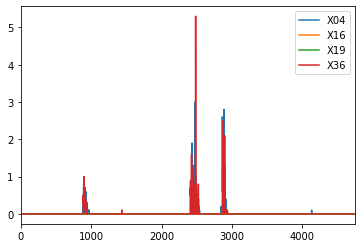

In [0]:
train_all.plot( y = ['X04','X16','X19','X36']) #이상한값 다시 확인

## 시계열 데이터 딥러닝 모델참고 예제 <br>
- 나스닥100 주식 예측 : https://m.blog.naver.com/silvury/220939233742
- stacked LSTM : https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
- keras 참고 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 주택가격 예측 딥러닝 모델 : https://www.codeonweb.com/entry/fe7882d2-e42a-4ef3-bbc2-e616d366e013
- 시계열 예측에서의 LSTM : https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

## 사용 모델(중 mse가 가장 작은 모델 사용할 예정)
1. DNN
2. LSTM for regressor
3. stack LSTM
4. GRU
5. 양방향 RNN
6. convolutional LSTM

## DNN

In [0]:
import pandas as pd
%tensorflow_version 1.x
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras

Using TensorFlow backend.


In [0]:
X_train = X_train.values #30일데이터에 대해서만 모델 학습한다. 
y_train = y_train.values

X_18_train = X_18_train.values #3일데이터는 전이학습. 
y_18_train = y_18_train.values

test_all=test_all.values #test 셋

In [0]:
#normalize
sc = MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_18_train = sc.fit_transform(X_18_train) 
test_all=sc.fit_transform(test_all)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [0]:
X_train.shape

(3888, 37)

In [0]:
y_train #확인 

array([[28.5, 36.5, 37.5, ..., 36.5, 39. , 42.5],
       [21.5, 24.5, 24.5, ..., 26.5, 29. , 29. ],
       [11.5,  9. ,  9. , ...,  8. ,  6.5,  8. ],
       ...,
       [18. , 18. , 17.5, ..., 17. , 17. , 17. ],
       [26.5, 33. , 32.5, ..., 28. , 35. , 35.5],
       [26. , 33.5, 32.5, ..., 28.5, 35.5, 34.5]])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
#초기화 
keras.initializers.he_normal(seed=None) #randomnormal
clf = Sequential([
    Dense(15, kernel_initializer='normal', input_dim=40, activation='relu'),
    Dense(20, kernel_initializer='normal', activation='relu'),
   # Dropout(0.25),
   # Dense(25, kernel_initializer='uniform', activation='elu'),
    Dense(18, kernel_initializer='normal', activation='elu'),
])

In [0]:
clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                615       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_3 (Dense)              (None, 18)                378       
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [0]:
#학습
clf.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [0]:
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

clf.fit(X_train, y_train, batch_size=15, epochs=1000, callbacks=[early_stop])




Epoch 1/1000





3888/3888 [==============================] - 1s 205us/step - loss: 282.4174 - mean_squared_error: 282.4174
Epoch 2/1000
3888/3888 [==============================] - 0s 76us/step - loss: 33.9915 - mean_squared_error: 33.9915
Epoch 3/1000
3888/3888 [==============================] - 0s 70us/step - loss: 21.6208 - mean_squared_error: 21.6208
Epoch 4/1000
3888/3888 [==============================] - 0s 75us/step - loss: 17.9812 - mean_squared_error: 17.9812
Epoch 5/1000
3888/3888 [==============================] - 0s 70us/step - loss: 16.2115 - mean_squared_error: 16.2115
Epoch 6/1000
3888/3888 [==============================] - 0s 68us/step - loss: 14.8162 - mean_squared_error: 14.8162
Epoch 7/1000
3888/3888 [==============================] - 0s 72us/step - loss: 13.8149 - mean_squared_error: 13.8149
Epoch 8/1000
3888/3888 [==============================] - 0s 69us/step - loss: 13.1604 - mean_squared_error: 13.1604
Epoch 9/1000
3888/3888 [=============================

In [0]:
score = clf.evaluate(X_test, y_test, verbose=0)
print(clf.metrics_names)
print(score) #mse

['loss', 'mean_squared_error']
[3.336571463832149, 3.336571463832149]


## LSTM for regression

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM
#import CallBack
%matplotlib inline

In [0]:
X_train.shape

(3888, 37)

In [0]:
#original : [samples, features] 
#LSTM data shape : [samples, time steps, features]
X_train_reshape = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

X_test_reshape = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [0]:
X_train_reshape.shape

(3888, 1, 37)

In [0]:
model = Sequential() #lstm
model.add(LSTM(20, input_shape=(1,40)))
model.add(Dense(32,activation = "relu"))
model.add(Dense(18))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                4880      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_5 (Dense)              (None, 18)                594       
Total params: 6,146
Trainable params: 6,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
#학습
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
#visible 40 inputs, hidden layer with 4 LSTM blocks and output makes 18 prediction
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

model.fit(X_train_reshape, y_train, epochs=100, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3110 samples, validate on 778 samples
Epoch 1/100
 - 1s - loss: 522.6552 - val_loss: 322.1652
Epoch 2/100
 - 0s - loss: 137.2680 - val_loss: 66.9939
Epoch 3/100
 - 0s - loss: 56.5272 - val_loss: 48.0050
Epoch 4/100
 - 0s - loss: 35.2953 - val_loss: 24.3807
Epoch 5/100
 - 0s - loss: 18.5432 - val_loss: 15.3326
Epoch 6/100
 - 0s - loss: 13.0587 - val_loss: 11.5041
Epoch 7/100
 - 0s - loss: 10.1172 - val_loss: 9.5351
Epoch 8/100
 - 0s - loss: 8.7295 - val_loss: 8.6709
Epoch 9/100
 - 0s - loss: 8.1301 - val_loss: 8.1981
Epoch 10/100
 - 0s - loss: 7.8023 - val_loss: 7.9041
Epoch 11/100
 - 0s - loss: 7.5521 - val_loss: 7.6826
Epoch 12/100
 - 0s - loss: 7.3898 - val_loss: 7.5030
Epoch 13/100
 - 0s - loss: 7.2320 - val_loss: 7.3648
Epoch 14/100
 - 0s - loss: 7.1207 - val_loss: 7.3041
Epoch 15/100
 - 0s - loss: 7.0072 - val_loss: 7.0991
Epoch 16/100
 - 0s - loss: 6.8853 - val_loss: 6.9784
Epoc

In [0]:
# make predictions
model.evaluate(X_test_reshape, y_test, batch_size=30)

432/432 [==============================] - 0s 43us/step


2.7913346737623215

## stacked LSTM

In [0]:
batch_size = 64
look_back = 40

(batch size를 64, 128, 256, 512 중 선택한다 : GPGPU는 cache가 작아서 hit확률이 60~70%여서 결국 빈번하게 memory에서 가져와야 하는데 이떄 메인 메모리에서 gpu내장 메모리 데이터를 땡겨올 때 bandwith가 중요해서 아무래도 증가폭이 2의 배수로 해당 대역폭이 증가하니 그에 맞게 맞춰서 데이터 떙기는데 영향을 주는 배치사이즈를 조정한다.) 

In [0]:
X_train.shape

(3888, 37)

In [0]:
#data shape
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
testX = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
testX.shape

(432, 37, 1)

In [0]:
stack_model = Sequential()
stack_model.add(LSTM(32, return_sequences = True, input_shape = (1, 37))) 
stack_model.add(LSTM(32))
stack_model.add(Dense(32, activation = 'relu'))
stack_model.add(Dropout(0.3))
stack_model.add(Dense(18))

In [0]:
#학습
stack_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

In [0]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

stack_model.fit(X_train_reshape, y_train, epochs=1000, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3110 samples, validate on 778 samples
Epoch 1/1000





 - 2s - loss: 501.3548 - mean_squared_error: 501.3548 - val_loss: 190.6599 - val_mean_squared_error: 190.6599
Epoch 2/1000
 - 0s - loss: 105.5958 - mean_squared_error: 105.5958 - val_loss: 65.6599 - val_mean_squared_error: 65.6599
Epoch 3/1000
 - 0s - loss: 80.4154 - mean_squared_error: 80.4154 - val_loss: 55.9301 - val_mean_squared_error: 55.9301
Epoch 4/1000
 - 0s - loss: 50.6456 - mean_squared_error: 50.6456 - val_loss: 19.9680 - val_mean_squared_error: 19.9680
Epoch 5/1000
 - 0s - loss: 33.8133 - mean_squared_error: 33.8133 - val_loss: 14.1427 - val_mean_squared_error: 14.1427
Epoch 6/1000
 - 0s - loss: 30.0026 - mean_squared_error: 30.0026 - val_loss: 13.1413 - val_mean_squared_error: 13.1413
Epoch 7/1000
 - 0s - loss: 29.0718 - mean_squared_error: 29.0718 - val_loss: 13.1978 - val_mean_squared_error: 13.1978
Epoch 8/1000

In [0]:
#prediction
stack_model.evaluate(X_test_reshape, y_test, batch_size=30)

432/432 [==============================] - 0s 72us/step


[8.658415463235643, 8.658415463235643]

## GRU

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

GRU = Sequential()
GRU.add(layers.GRU(20,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,input_shape=(1,40)))
GRU.add(layers.GRU(20, activation='relu',dropout=0.1,recurrent_dropout=0.5))
GRU.add(layers.Dense(18))
GRU.compile(optimizer=RMSprop(), loss='mse')
GRU.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 20)             3660      
_________________________________________________________________
gru_2 (GRU)                  (None, 20)                2460      
_________________________________________________________________
dense_8 (Dense)              (None, 18)                378       
Total params: 6,498
Trainable params: 6,498
Non-trainable params: 0
_________________________________________________________________


In [0]:
#3번모델 학습
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

GRU.fit(X_train_reshape,y_train, epochs = 100, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

NameError: ignored

In [0]:
#평가
GRU.evaluate(X_test_reshape, y_test, batch_size=30)

432/432 [==============================] - 0s 65us/step


4.747572223345439

## 양방향RNN

In [0]:
from keras.layers import Bidirectional
from keras import optimizers

In [0]:
# 다층 양방향 LSTM을 구현하기 위한 함수
model = Sequential()
model.add(Bidirectional(LSTM(15, return_sequences = True), input_shape = (1,37)))
#model.add(Bidirectional(LSTM(20, return_sequences = True)))
model.add(Bidirectional(LSTM(20, return_sequences = False)))
model.add(Dense(20, activation = 'tanh'))
#model.add(Dropout(0.3))
model.add(Dense(18))
    
adam = optimizers.Adam(lr = 0.0004)
model.compile(loss = 'mse', optimizer = adam, metrics = ['mse'])

In [0]:
#4번
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

model.fit(X_train_reshape,y_train, epochs = 1000, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

Train on 3110 samples, validate on 778 samples
Epoch 1/1000
 - 11s - loss: 586.5985 - mean_squared_error: 586.5985 - val_loss: 551.3533 - val_mean_squared_error: 551.3533
Epoch 2/1000
 - 1s - loss: 499.2511 - mean_squared_error: 499.2511 - val_loss: 464.2972 - val_mean_squared_error: 464.2972
Epoch 3/1000
 - 1s - loss: 441.1112 - mean_squared_error: 441.1112 - val_loss: 422.0581 - val_mean_squared_error: 422.0581
Epoch 4/1000
 - 1s - loss: 403.6076 - mean_squared_error: 403.6076 - val_loss: 388.1092 - val_mean_squared_error: 388.1092
Epoch 5/1000
 - 1s - loss: 371.7083 - mean_squared_error: 371.7083 - val_loss: 358.1305 - val_mean_squared_error: 358.1305
Epoch 6/1000
 - 1s - loss: 343.1965 - mean_squared_error: 343.1965 - val_loss: 331.0599 - val_mean_squared_error: 331.0599
Epoch 7/1000
 - 1s - loss: 317.3015 - mean_squared_error: 317.3015 - val_loss: 306.3823 - val_mean_squared_error: 306.3823
Epoch 8/1000
 - 1s - loss: 293.6130 - mean_squared_error: 293.6130 - val_loss: 283.6251 - v

In [0]:
#평가
model.evaluate(X_test_reshape, y_test, batch_size=64)

432/432 [==============================] - 0s 56us/step


[1.9300755041616935, 1.9300755041616935]

## convolution LSTM
- 기존 LSTM알고리즘의 입출력변수의 차원을 확장시킨 알고리즘.
- 이미지데이터 사용시 의미가 있음.

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

In [0]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

## 하이퍼파라미터 튜닝하기
- 활성함수
- 유닛수 
- 배치 정규화 
- 최적화 방법

In [0]:
from keras.layers import BatchNormalization

stack_model = Sequential()
stack_model.add(LSTM(15, return_sequences = True, input_shape = (1, 40)))
stack_model.add(LSTM(20))
#stack_model.add(LSTM(20, input_shape = (1,40)))
stack_model.add(Dropout(0.3))

stack_model.add(Dense(20, activation = 'relu'))
stack_model.add(Dense(20, activation = 'relu'))
stack_model.add(Dense(18))

stack_model.compile(loss='mean_squared_error', optimizer='adam')
stack_model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 15)             3360      
_________________________________________________________________
lstm_10 (LSTM)               (None, 20)                2880      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 18)                378       
Tota

In [0]:
#튜닝1
from keras.layers import BatchNormalization

stack_model = Sequential()
stack_model.add(LSTM(16, return_sequences = True, input_shape = (1, 40)))
stack_model.add(LSTM(16, return_sequences = True))
stack_model.add(LSTM(16))
stack_model.add(Dropout(0.3))

#stack_model.add(Dense(20, activation = 'relu'))
stack_model.add(Dense(16, activation = 'relu'))
stack_model.add(Dense(18))

stack_model.compile(loss='mean_squared_error', optimizer='adam')
stack_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_47 (LSTM)               (None, 1, 16)             3648      
_________________________________________________________________
lstm_48 (LSTM)               (None, 1, 16)             2112      
_________________________________________________________________
lstm_49 (LSTM)               (None, 1, 16)             2112      
_________________________________________________________________
lstm_50 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 18)              

In [0]:
# 튜닝2
from keras.layers import BatchNormalization

stack_model = Sequential()
stack_model.add(LSTM(120, return_sequences = True, input_shape = (1, 40)))
stack_model.add(LSTM(120))
stack_model.add(Dropout(0.3))
#stack_model.add(Dense(20, activation = 'relu'))
stack_model.add(Dense(18))

stack_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
stack_model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 1, 120)            77280     
_________________________________________________________________
lstm_23 (LSTM)               (None, 120)               115680    
_________________________________________________________________
dropout_8 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 18)                2178      
Total params: 195,138
Trainable params: 195,138
Non-trainable params: 0
_________________________________________________________________


In [0]:
#튜닝3
from keras.layers import BatchNormalization
stack_model = Sequential()
stack_model.add(LSTM(32, return_sequences = True, input_shape = (1, 40)))
stack_model.add(LSTM(32))
stack_model.add(Dropout(0.2))
stack_model.add(Dense(32, activation = 'relu'))
stack_model.add(Dense(18))

stack_model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
stack_model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 32)             9344      
_________________________________________________________________
lstm_25 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_76 (Dense)             (None, 18)                594       
Total params: 19,314
Trainable params: 19,314
Non-trainable params: 0
_________________________________________________________________


In [0]:
#실행
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

stack_model.fit(X_train_reshape, y_train, epochs=1000, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

Train on 3110 samples, validate on 778 samples
Epoch 1/1000
 - 9s - loss: 578.0028 - val_loss: 474.2728
Epoch 2/1000
 - 1s - loss: 234.5030 - val_loss: 97.7463
Epoch 3/1000
 - 1s - loss: 83.6220 - val_loss: 66.8240
Epoch 4/1000
 - 1s - loss: 77.0152 - val_loss: 65.5869
Epoch 5/1000
 - 1s - loss: 76.1030 - val_loss: 65.6892
Epoch 6/1000
 - 1s - loss: 76.9941 - val_loss: 65.5657
Epoch 7/1000
 - 1s - loss: 76.1248 - val_loss: 65.8936
Epoch 8/1000
 - 1s - loss: 75.5793 - val_loss: 65.4948
Epoch 9/1000
 - 1s - loss: 74.2420 - val_loss: 65.3680
Epoch 10/1000
 - 1s - loss: 74.8591 - val_loss: 65.3312
Epoch 11/1000
 - 1s - loss: 75.5322 - val_loss: 65.4670
Epoch 12/1000
 - 1s - loss: 74.0217 - val_loss: 65.6954
Epoch 13/1000
 - 1s - loss: 76.1645 - val_loss: 65.3930
Epoch 14/1000
 - 1s - loss: 76.0633 - val_loss: 65.4971
Epoch 15/1000
 - 1s - loss: 72.5802 - val_loss: 65.6122
Epoch 16/1000
 - 1s - loss: 74.0029 - val_loss: 65.2954
Epoch 17/1000
 - 1s - loss: 71.3691 - val_loss: 46.8722
Epoch 1

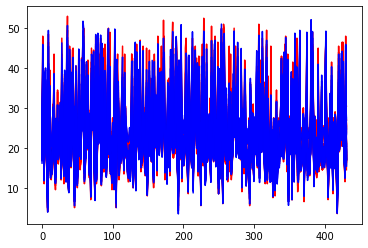

In [0]:
#시각화 
predtest_viz = model.predict(X_test_reshape)
#시각화하여 비교
import matplotlib.pyplot as plt
plt.plot(y_test,c='r') #실제값
plt.plot(predtest_viz, c='b') #예측값
plt.show()

In [0]:
#prediction
score= stack_model.evaluate(X_test_reshape, y_test, batch_size=30)
print(score)

432/432 [==============================] - 0s 86us/step
7.9621608654658


## 전이학습

In [0]:
#가장 성능이 좋은 stack 모델을 전이한다.
from keras.models import load_model
model.save('bilstm_stack_3_0314.h5') #0314

In [0]:
model = load_model('bilstm_stack_3_0314.h5')

In [0]:
#전이학습의 틀도 조정해야 한다. (얼마나 가져올건지) ;튜닝전
model2 = Sequential()
#마지막 layer만 빼고 가져온다. 
for layer in model.layers[:-1]:
    model2.add(layer)

#freeze the layers
for layer in model2.layers:
    layer.trainable = False

model2.add(Dense(20, activation = 'relu'))
model2.add(Dense(1))
model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

전이학습 하이퍼파라미터 튜닝
- 원본모델의 상위층은 하위층보다는 덜 유용하다. 새로운 작업에서 필요한 고수준의 특성은 원본 작업에서 유용했던 특성과는 다르기 때문이다. 
- 재사용할 layer 갯수
- 추가 layer의 수 + 출력층

In [0]:
model.layers

In [0]:
model.layers[:-1]# 마지막 출력층까지 가져와서 동결하는 경우 

In [0]:
model.layers[:-2]

In [0]:
model2 = Sequential()
#마지막 layer만 빼고 가져온다. (동결, 재사용층)
for layer in model.layers[:-1]:
    model2.add(layer)

#가져오는 층은 동결한다. 
for layer in model2.layers:
    layer.trainable = False

#동결하지 않고 가중치 갱신할 층 (동결안함, 재사용층)
#model2.add(model.layers[1])
#model2.add(model.layers[2])
#model2.add(model.layers[3])

#새로운 train데이터에 대한 은닉층 생성 (새로운 데이터에 대한 학습층)
#model2.add(Bidirectional(LSTM(16, return_sequences = False)))
#model2.add(LSTM(20 , return_sequences= True))
#model2.add(Dropout(0.25))
model2.add(Dense(20, activation = 'relu'))
#출력층 
model2.add(Dense(1))
model2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [0]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_16 (Bidirectio (None, 1, 30)             6360      
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 40)                8160      
_________________________________________________________________
dense_21 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 21        
Total params: 15,781
Trainable params: 441
Non-trainable params: 15,340
_________________________________________________________________


In [0]:
X_18_train_reshape = np.reshape(X_18_train, (X_18_train.shape[0], 1, X_18_train.shape[1]))

In [0]:
X_18_train.shape

(432, 37)

In [0]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1)

model2.fit(X_18_train_reshape,y_18_train, epochs = 1000, validation_split = 0.2, verbose = 2, callbacks = [early_stop])

Train on 345 samples, validate on 87 samples
Epoch 1/1000
 - 9s - loss: 991.0965 - val_loss: 1245.6870
Epoch 2/1000
 - 0s - loss: 829.4286 - val_loss: 1044.7818
Epoch 3/1000
 - 0s - loss: 686.6107 - val_loss: 865.7999
Epoch 4/1000
 - 0s - loss: 554.4368 - val_loss: 691.1268
Epoch 5/1000
 - 0s - loss: 433.7488 - val_loss: 543.1374
Epoch 6/1000
 - 0s - loss: 339.2863 - val_loss: 426.5647
Epoch 7/1000
 - 0s - loss: 264.4086 - val_loss: 330.7569
Epoch 8/1000
 - 0s - loss: 202.7675 - val_loss: 251.7743
Epoch 9/1000
 - 0s - loss: 152.4234 - val_loss: 187.8535
Epoch 10/1000
 - 0s - loss: 112.3193 - val_loss: 137.6426
Epoch 11/1000
 - 0s - loss: 81.3079 - val_loss: 99.6588
Epoch 12/1000
 - 0s - loss: 58.6521 - val_loss: 71.7501
Epoch 13/1000
 - 0s - loss: 42.7623 - val_loss: 51.5215
Epoch 14/1000
 - 0s - loss: 31.3823 - val_loss: 38.0905
Epoch 15/1000
 - 0s - loss: 24.4272 - val_loss: 28.9787
Epoch 16/1000
 - 0s - loss: 20.1629 - val_loss: 23.1622
Epoch 17/1000
 - 0s - loss: 17.5008 - val_loss

In [0]:
#모델에서 예측한 값과 실제 y18값의 비교
predtest_viz = model2.predict(X_18_train_reshape)

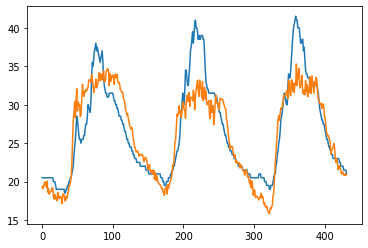

In [0]:
#시각화하여 비교
import matplotlib.pyplot as plt
plt.plot(y_18_train)
plt.plot(predtest_viz)
plt.show()  #왜 윗부분 학습을 못시킬까... 튜닝의 문제는 아닐 것같음(layer쌓아도 달라지지 않음.)

test 데이터 예측

In [0]:
test_all_reshape = np.reshape(test_all, (test_all.shape[0], 1, test_all.shape[1]))

In [0]:
pred = model2.predict(test_all_reshape) #제출정답

In [0]:
df=pd.DataFrame(pred)

In [0]:
df = df.round(3)

In [0]:
df.head()

,0
0,21.112000
1,21.198999
2,21.223000
3,20.936001
4,20.830999


In [0]:
df.to_csv("prediction_15.csv")